# **SUMÁRIO**

ESTE ARQUIVO POSSUI O SEGUINTE CONTEÚDO:
```
1. Struct

2. TAD (Tipo Abstrato de Dados)
   2.1 Processo de Modularização
   2.2 Arquivos Cabeçhalhos (.h)
   2.3 Tipo Abstrato de Dados (TAD)
   2.4 Makefile

3. Pilha (Stack)

4. Fila (Queue)
```


---

# **1. Struct**

- Define um conjunto de informações/tipos atribuídos a um elemento, como uma "pessoa" que pode ser descrita pelo nome, endereço, idade, estado civil e mais. Abaixo se encontra um exemplo da aplicação:


```c
#include <stdio.h>

typedef struct {
    char nome[30];
    int idade;
    char endereco[100];
} Dados;

void ler_dados(Dados *p1) {
    printf("Entre com o nome: ");
    scanf("%s", p1->nome);
    printf("Entre com a idade: ");
    scanf("%d", p1->idade);
    printf("Entre com o endereco: ");
    scanf("%s", p1->endereco);
}

void imprimir_pessoa(Dados *p1)
{
   printf("----------------------\n");
   printf("Nome: %s\n", p1->nome);
   printf("Idade: %d\n", p1->idade);
   printf("Endereco: %s\n", p1->endereco);
   printf("----------------------\n");
}

int main(void) {
    Dados pessoa1;
    ler_dados(&pessoa1);
    imprimir_pessoa(&pessoa1);

    return 0;
}
```


---

# **TAD (Tipo Abstrato de Dados)**

### **1. Processo de Modularização**

- Os dados armazenados podem ser manipulados apenas pelos operadores, com isso se tem um encapsulamento de informações, escondendo o código fonte do que é fornecido ao usuário para testar.

- Só se tem acesso às operações de manipulação dos dados, e não os dados em si

- Assim, é dividido o programa em vários arquivos (Modularização), na qual tem-se os `arquivos fonte (.c)` chamados agora de módulos. Como a linguagem C é compilada, então cada um desses arquivos devem ser compilados separadamente, resultando em `arquivos objeto (.o ou .obj)`. Após a compilação, esses arquivos objeto devem ser juntados em um só em uma linguagem de máquina, sendo os `arquivos executávels (.exe)`.

Um exemplo disso é se ter um arquivo fonte funcoes.c que contem as funções de manipulação já declaradas, e um arquivo fonte main.c que apenas terá os parâmetros de chamada para o que está no outro arquivo. Os comandos para a compilação desses dados de exemplo são dados como: 
- > gcc -c funcoes.c
- > gcc -c main.c
- > gcc -o teste.exe funcoes.o main.o

### **2. Arquivos cabeçalhos (.h)**

- Os `arquivos cabeçalhos (.h)` são associados a cada módulo (provindos dos arquivos fonte) trazendo as definições das funções que ele exporta. Ele segue o mesmo nome do arquivo a qual associa (funcoes.h, como exemplo)

Olhe um exemplo de implementação:

#### **funcoes.c**
```c
#include <stdio.h>
int comprimento (char* strg){
    int i = 0;
    while (strg[i] != '\0') {
        i++;}
    return i;}

void copia (char* dest, char* orig){
    int i = 0;
    while (orig[i] != '\0') {
        dest[i] = orig[i];
        i++;}
    dest[i] = '\0';}

void concatena (char* dest, char* orig){
    int i = 0;
    while (dest[i] != '\0') {
        i++;}
    int j = 0;
    while (orig[j] != '\0') {
        dest[i] = orig[j];
        i++;
        j++;}
    dest[i] = '\0';}
```

#### **funcoes.h**
```c
int comprimento (char* str); // Função comprimento: Retorna n° de caracteres da str 
void copia (char* dest, char* orig); // Função copia: Copia a str orig para a str dest
void concatena (char* dest, char* orig); // Função concatena: Concatena a str orig na str dest 
```

#### **main.c**
```c
#include <stdio.h>      // Módulo da Biblioteca C Padrão
#include "funcoes.h"    // Módulo Próprio 
int main (void) {
    char str[101], str1[51], str2[51];
    printf("Entre com uma sequência de caracteres: ");
    scanf(" %50[^\n]", str1);
    printf("Entre com outra sequência de caracteres: ");
    scanf(" %50[^\n]", str2);
    copia(str, str1);  concatena(str, str2);
    printf("Comprimento total: %d\n",comprimento(str));
    return 0;}
```

_OBS: usar "<...>" indica ao compilador onde deve procurar os arquivos de cabeçalho/importações_


### **3. Tipo Abstrato de Dados (TAD)**

- Permite que um programa especializado em uma função seja implantado e dentro de um programa. Exemplo em portugol:

```portugol
programa cálculos matemáticos
    usar TAD de números racionais
início
    declarar i inteiro
    declarar r(10) racional
    para i=1 até 10 faça
        ler_numeros(r,i)
    calcular_media(r,10)
...
fim
```

O programa usa esse Tad, que tem essas funções de ler numeros e calcular media, e outro programa tbm poderia implementar. Agora um exemplo real em C (TAD: Matrix m x n):

#### **matriz.h**
```c
typedef struct matriz Matriz;  // tipo exportado

Matriz* cria (int m, int n); // função cria: aloca e retorna matrix m x n
void libera (Matriz* mat); // função libera a memória de uma matriz
float acessa (Matriz* mat, int i, int j); // retorna o valor do elemento [i][j]
void atribui (Matriz* mat, int i, int j, float v); // atribui valor ao elemento [i][j]
int linhas (Matriz* mat); // retorna o n° de linhas da matriz
int colunas (Matriz* mat); // retorna o n° de colunas da matriz
```

#### **matriz.c**

```c
#include <stdlib.h> // malloc, free, exit 
#include <stdio.h>  // printf
#include "matriz.h"

struct matriz {int lin; int col; float* v;};

Matriz* cria (int m, int n) {
   Matriz* mat = (Matriz*) malloc(sizeof(Matriz));
   if (mat == NULL) {
       printf("Memória insuficiente!\n");
       exit(1);
   }
   mat->lin = m;
   mat->col = n;
   mat->v = (float*) malloc(m*n*sizeof(float));
   return mat;
}
void libera (Matriz* mat){
   free(mat->v);
   free(mat);
}

float acessa (Matriz* mat, int i, int j) {
   int k; // índice do elemento no vetor 
   if (i<0 || i>=mat->lin || j<0 || j>=mat->col) {
       printf("Acesso inválido!\n");
       exit(1);
   }
   k = i*mat->col + j;
   return mat->v[k];
}
int linhas (Matriz* mat) {
   return mat->lin;
}

void atribui (Matriz* mat, int i, int j, float v) {
   int k; // índice do elemento no vetor
   if (i<0 || i>=mat->lin || j<0 || j>=mat->col) {
       printf("Atribuição inválida!\n");
       exit(1);
   }
   k = i*mat->col + j;
   mat->v[k] = v;
}
int colunas (Matriz* mat) {
   return mat->col;
}
```

#### **Programa ao cliente que usará o TAD - main.c**

```c
#include <stdio.h>
#include <stdlib.h>
#include "matriz.h"
int main(int argc, char *argv[]){
 float a,b,c,d; 
 Matriz *M;
 M = cria(5,5); // criação de uma matriz 
 atribui(M,1,2,40); // inserção de valores na matriz
 atribui(M,2,3,3);
 atribui(M,3,0,15);
 atribui(M,4,1,21);
 a = acessa(M,1,2); // verificando se a inserção foi feita certo
 b = acessa(M,2,3);
 c = acessa(M,3,0);
 d = acessa(M,4,1);
  ...
 return 0;
}
```



### **4. Makefile**

- Arquivo que permite a compilação e execução de arquivos C mais facilmente. Um exemplo de seu uso:

```Makefile
# Makefile (windows)
EXEC = calculadoraConjuntos.exe

all: $(EXEC)

$(EXEC): main.c conjunto.c conjunto.h
	gcc main.c conjunto.c -o $(EXEC)

run: all
	.\$(EXEC)

clean:
	del /f /q $(EXEC) 2>nul || rm -f $(EXEC)

```

- Comandos:
> make all

> make run

> make clean


---
# **Pilha (Stack)**

- L.I.F.O = *Last in, First out*
- Elementos são colocados no topo da pilha e são retirados também dele

Operações:
- `Push(P,X)`: empilha o valor da variável X na pilha P
- `Pop(P,X)`: desempilha P e retorna em X o valor do elemento que estava no topo de P
- `X=top(P)`: acessa o valor do elemento do topo de P, sem desempilhar
- `Create(P)`: cria/inicializa uma pilha vazia P, deixando-a pronta para ser usada (para qualquer que seja a aplicação)
- `Y=IsEmpty(P)`: Y recebe true se a pilha estiver vazia; false caso contrário
- `Empty(P)`: esvazia uma pilha P

- **Alocação Sequencial**: os elementos ficam em sequência (um do lado do outro) na memória
- **Alocação Estática**: todo o espaço da memória a ser usado pela pilha é reservado (alocado) na compilação, e esse espaço continua reservado durante a execução do programa

- Exemplo em C:

```c
#define TamPilha 100
typedef int elem;
typedef struct {
    int topo;
    elem itens[TamPilha];
} Pilha;
Pilha P;

```


---
# **Fila (Queue)**

- F.I.F.O = *First in, First out*
- Novos elementos entram no fim da fila, e o único que pode sair dela é o primeiro elemento

Operações:
- `Cria(F)`: cria uma fila F vazia
- `Entra(F,X)`: X entra no fim da fila F
- `Sai(F,X)`: o primeiro elemento da fila F é retirado da fila e atribuído a X
- `Y=EstaVazia(F)`: verdade se a fila estivar vazia; caso contrário, falso
- `Y=EstaCheia(F)`: verdade se a fila estiver cheia; caso contrário, falso

- **Alocação Sequencial**: os elementos ficam em sequência (um do lado do outro) na memória
- **Alocação Estática**: todo o espaço da memória a ser usado pela pilha é reservado (alocado) na compilação, e esse espaço continua reservado durante a execução do programa

Implementação da fila

- Início: aponta ao 1° da fila (1° a sair)
- Fim: aponta ao fim da fila (próximo elemento a sair)

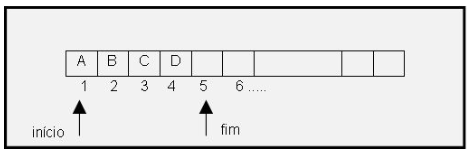

Com isso se a fila está vazia, inicio = 0 e fim = 1

- Para reutilizar espaços que saíram do início da fila, usa um **vetor circular**

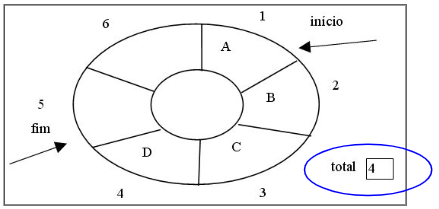

Com isso, total = 0 para fila vazia, total = tamanho da fila quando cheia e a condição inicial é total = 0 e inicio = fim = 1. Olhe esse exemplo da continuação de uma fila:

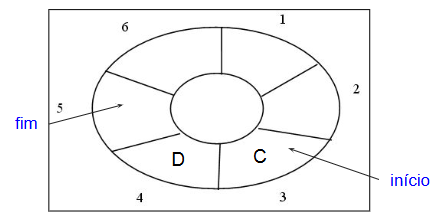

- Exemplo em C:

```c
#define TamFila 100
typedef int elem;
typedef struct {
    int inicio, fim, total;
    elem itens[TamFila];
} Fila;
Fila F;
```




chcp 65001 --> permite caracteres especiais na saída